In [7]:
# importing packages 
import yfinance as yf
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , LSTM

2022-10-15 10:08:42.697907: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-15 10:09:04.078088: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-15 10:09:04.078121: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-15 10:09:04.982440: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-15 10:09:11.985880: W tensorflow/stream_executor/platform/de

In [8]:
#loading dataset
df = pd.read_csv("../data/ALGO-USD.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-10-12,1.717085,1.754366,1.608586,1.744901,1.744901,411949621
1,2021-10-13,1.746279,1.844707,1.692659,1.838683,1.838683,356995291
2,2021-10-14,1.837135,1.880034,1.780301,1.804155,1.804155,337223002
3,2021-10-15,1.809252,1.809252,1.732818,1.752944,1.752944,327662647
4,2021-10-16,1.753223,1.847857,1.735609,1.796759,1.796759,353041362


In [9]:
# checking null values 
df.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
360,False,False,False,False,False,False,False
361,False,False,False,False,False,False,False
362,False,False,False,False,False,False,False
363,False,False,False,False,False,False,False


In [11]:
# data info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       365 non-null    object 
 1   Open       365 non-null    float64
 2   High       365 non-null    float64
 3   Low        365 non-null    float64
 4   Close      365 non-null    float64
 5   Adj Close  365 non-null    float64
 6   Volume     365 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 20.1+ KB


In [12]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [13]:
#describe data
df.describe

<bound method NDFrame.describe of            Date      Open      High       Low     Close  Adj Close     Volume
0    2021-10-12  1.717085  1.754366  1.608586  1.744901   1.744901  411949621
1    2021-10-13  1.746279  1.844707  1.692659  1.838683   1.838683  356995291
2    2021-10-14  1.837135  1.880034  1.780301  1.804155   1.804155  337223002
3    2021-10-15  1.809252  1.809252  1.732818  1.752944   1.752944  327662647
4    2021-10-16  1.753223  1.847857  1.735609  1.796759   1.796759  353041362
..          ...       ...       ...       ...       ...        ...        ...
360  2022-10-07  0.348716  0.349535  0.336827  0.341346   0.341346  105832613
361  2022-10-08  0.341319  0.341388  0.332154  0.334289   0.334289   69329530
362  2022-10-09  0.334262  0.339356  0.331048  0.338705   0.338705   61607099
363  2022-10-10  0.338678  0.339630  0.320155  0.320155   0.320155   84680560
364  2022-10-11  0.317831  0.323412  0.311265  0.320843   0.320843   98425520

[365 rows x 7 columns]>

### Plots

In [14]:
# data plots
df["Close"]=pd.to_numeric(df.Close,errors='coerce')

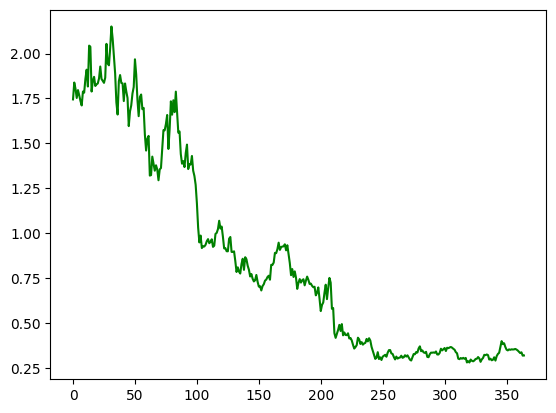

In [15]:
# 'Close' feature  
plt.plot(df.index, df['Close'], color = 'green', label = 'Close')
plt.show()

## Data Preprocessing 

In [17]:
# saving 'Close' feature in a variable name dataV1, since we only need that
dataV1 = df.iloc[:,3:4]
dataV1 = dataV1.values
dataV1.shape

(365, 1)

In [19]:
# normalizing the data using MinMaxScaler
Scaler = MinMaxScaler(feature_range=(0,1))
dataV1 = Scaler.fit_transform(dataV1)
dataV1.shape

(365, 1)

In [20]:
# declaring feature length
feature_length = 100
# Function to create x and y data
def Create_Features_and_Targets(data, feature_length):
  X = list()
  Y = list()
  for i in range(len(data) - feature_length -1):
    X.append(data[i:(i + feature_length), 0])
    Y.append(data[i + feature_length, 0])
  X = np.array(X)
  Y = np.array(Y)
  return X,Y

In [22]:
X_train, y_train = Create_Features_and_Targets(dataV1, feature_length)

In [23]:
# Making data 3 dimensional
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [24]:
X_train.shape, y_train.shape

((264, 100, 1), (264,))

## LSTM Model

In [25]:
model = Sequential([
    LSTM(128, return_sequences = True, input_shape =(X_train.shape[1],1)),
    Dropout(0.45),

    LSTM(128, return_sequences = False),
    Dropout(0.4),
    Dense(1),
])
model.compile(optimizer='adam',loss="mean_squared_error")

2022-10-15 10:24:33.355903: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-15 10:24:33.355965: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-15 10:24:33.356018: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jo-HP-Notebook): /proc/driver/nvidia/version does not exist
2022-10-15 10:24:33.357035: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 128)          66560     
                                                                 
 dropout (Dropout)           (None, 100, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 198,273
Trainable params: 198,273
Non-trainable params: 0
_________________________________________________________________


In [28]:
#LSTM Training the model
history = model.fit(
    X_train, 
    y_train, 
    epochs = 20, 
    batch_size = 12, 
    verbose=1,
)


Epoch 1/20
22/22 [==============================] - 4s 176ms/step - loss: 9.0026e-04
Epoch 2/20
22/22 [==============================] - 4s 172ms/step - loss: 7.7682e-04
Epoch 3/20
22/22 [==============================] - 4s 175ms/step - loss: 9.9597e-04
Epoch 4/20
22/22 [==============================] - 4s 172ms/step - loss: 7.8940e-04
Epoch 5/20
22/22 [==============================] - 4s 179ms/step - loss: 0.0013
Epoch 6/20
22/22 [==============================] - 5s 212ms/step - loss: 8.3980e-04
Epoch 7/20
22/22 [==============================] - 5s 204ms/step - loss: 8.5436e-04
Epoch 8/20
22/22 [==============================] - 5s 205ms/step - loss: 7.8610e-04
Epoch 9/20
22/22 [==============================] - 5s 224ms/step - loss: 8.3560e-04
Epoch 10/20
22/22 [==============================] - 6s 254ms/step - loss: 0.0011
Epoch 11/20
22/22 [==============================] - 5s 212ms/step - loss: 8.4472e-04
Epoch 12/20
22/22 [==============================] - 6s 270ms/step - lo

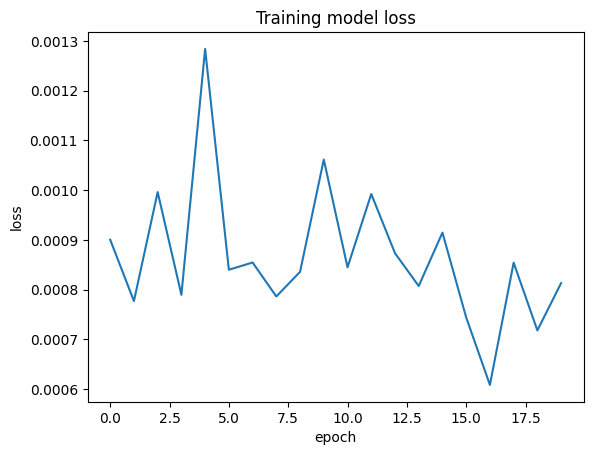

In [29]:
# training model
plt.plot(history.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [30]:
testData = df.iloc[:,3:4] 
y_real = testData.iloc[feature_length+1:,0:].values 
x_test = testData.iloc[:,0:].values  
y_real.shape, x_test.shape

((264, 1), (365, 1))

In [31]:
# normalize
x_test = Scaler.transform(x_test)
x_test.shape

(365, 1)

In [32]:
x_test, y_test = Create_Features_and_Targets(x_test, feature_length)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1)) 
x_test.shape

(264, 100, 1)

In [33]:
# making predictions
y_pred = model.predict(x_test)

9/9 [==============================] - 2s 91ms/step


In [34]:
predicted_price = Scaler.inverse_transform(y_pred)

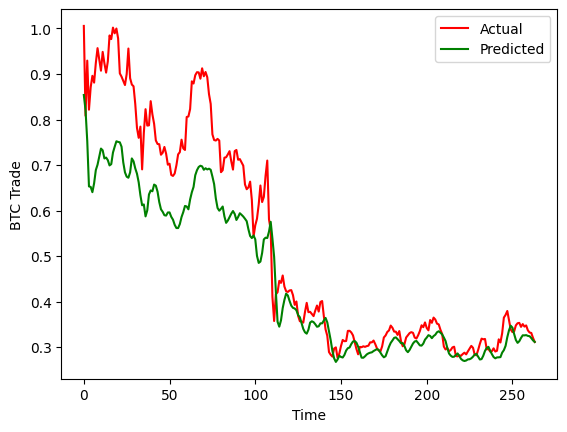

In [35]:
#Actual Stock Price and the Predicted Stock Price
plt.plot(y_real, color = 'red', label = 'Actual')
plt.plot(predicted_price, color = 'green', label = 'Predicted')
plt.xlabel('Time')
plt.ylabel('BTC Trade')
plt.legend()
plt.show()